## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of visually and statistically exploring the dataset to uncover patterns, relationships, and important characteristics.

Rather than jumping straight into machine learning, we first take time to understand the data. This step is like getting to know the "personality" of our dataset.

**Why is it important?**
- **Understand the dataset** → What features do we have? What types of values do they contain?

- **Spot patterns and distributions** → For example, which education levels are most common, or how age is spread.

- **Detect issues** → Like outliers, skewed distributions, or imbalanced classes.

- **Guide model building** → The insights gained often shape preprocessing, feature engineering, and algorithm choice. 

In [153]:
from sklearn.datasets import fetch_openml
import pandas as pd

adult = fetch_openml(name="adult", version=2, as_frame=True)

df_adult = adult.frame


In [154]:
df_adult=df_adult.drop(columns=['fnlwgt'])
df_adult=df_adult.drop_duplicates()
print(df_adult.head())

    age  workclass     education  education-num      marital-status  \
0  25.0    Private          11th            7.0       Never-married   
1  38.0    Private       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  Some-college           10.0  Married-civ-spouse   
4  18.0        NaN  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4                NaN    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country  class  
0            40.0  United-States  <=50K  
1       

In [155]:
df_adult.shape

(42468, 14)


**Different Types of Data Analysis**

####  1. Univariate Analysis (one variable at a time)  
Focuses on the **distribution of a single feature**.  

**For categorical variables** (like education, workclass, gender):  
- **Bar plots** → show category counts.  
- Example: A bar plot of *education levels* shows which qualifications are most common.   

**For numerical variables** (like age, hours-per-week, capital-gain):  
- **Histograms** → show distribution (e.g., most people work ~40 hours per week).  
- **Boxplots** → highlight outliers (e.g., a few people have very high capital gains).   


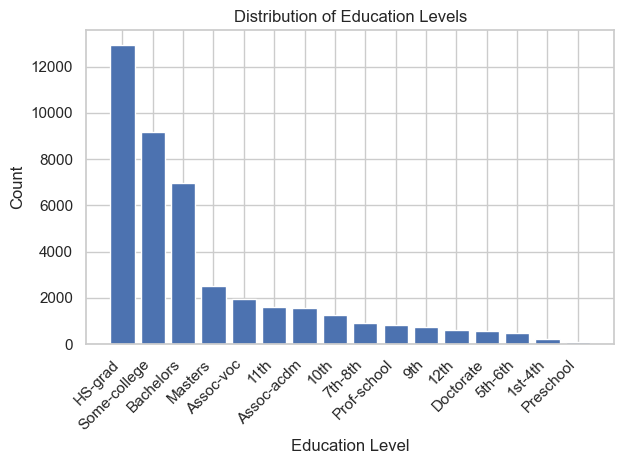

In [156]:
import matplotlib.pyplot as plt

education_counts = df_adult['education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

plt.show()

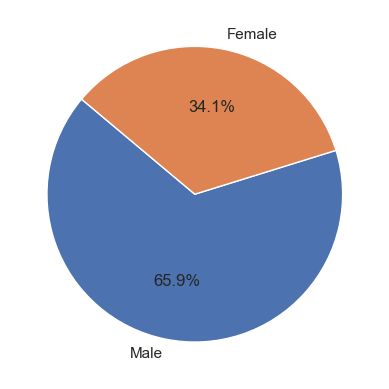

In [157]:
import matplotlib.pyplot as plt

gender_counts= df_adult['sex'].value_counts()

plt.pie(gender_counts.values,labels=gender_counts.index,autopct='%1.1f%%', startangle=140)

plt.show()

Lets take a look at the distrubution of numerical features with the help of histograms and box plots

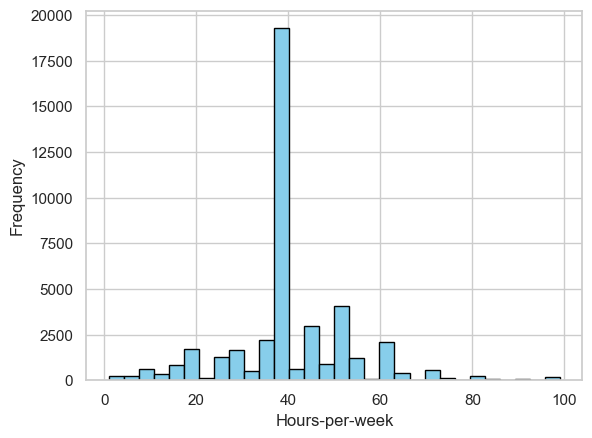

In [158]:
import matplotlib.pyplot as plt
import numpy as np


plt.hist(df_adult['hours-per-week'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')

plt.show()

Box plots are also useful in detecting outliers as we have seen in 1.Data Cleaning notebook

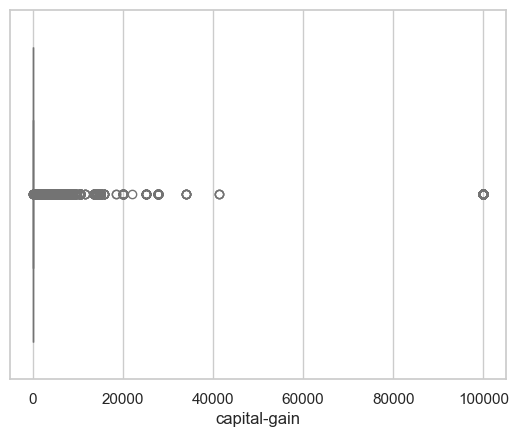

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_adult['capital-gain'], color='lightgreen')
plt.show()

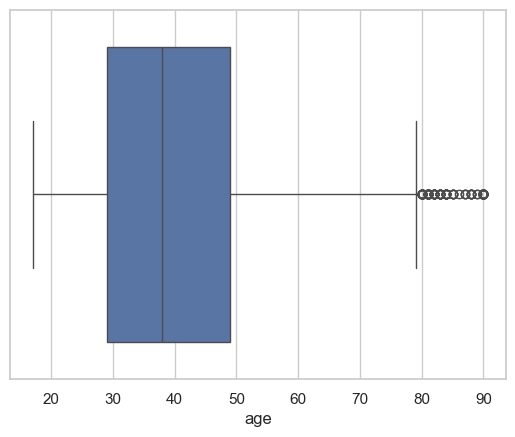

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_adult['age'])
plt.show()


####  2. Bivariate Analysis (two variables at a time)  
Helps us understand the **relationship between two features**, especially with the **target variable (income class)**.  

**Categorical vs Target:**  
- **Stacked bar plot** → income class by education level. 

**Numerical vs Target:**  
- **Boxplots grouped by target** → e.g., *age vs income class*, showing whether higher income is linked to certain age groups.  
- **Violin plots (optional)** → similar to boxplots but also show density distribution.  

**Numerical vs Numerical:**  
- **Scatter plots** → e.g., *age vs hours-per-week*. 

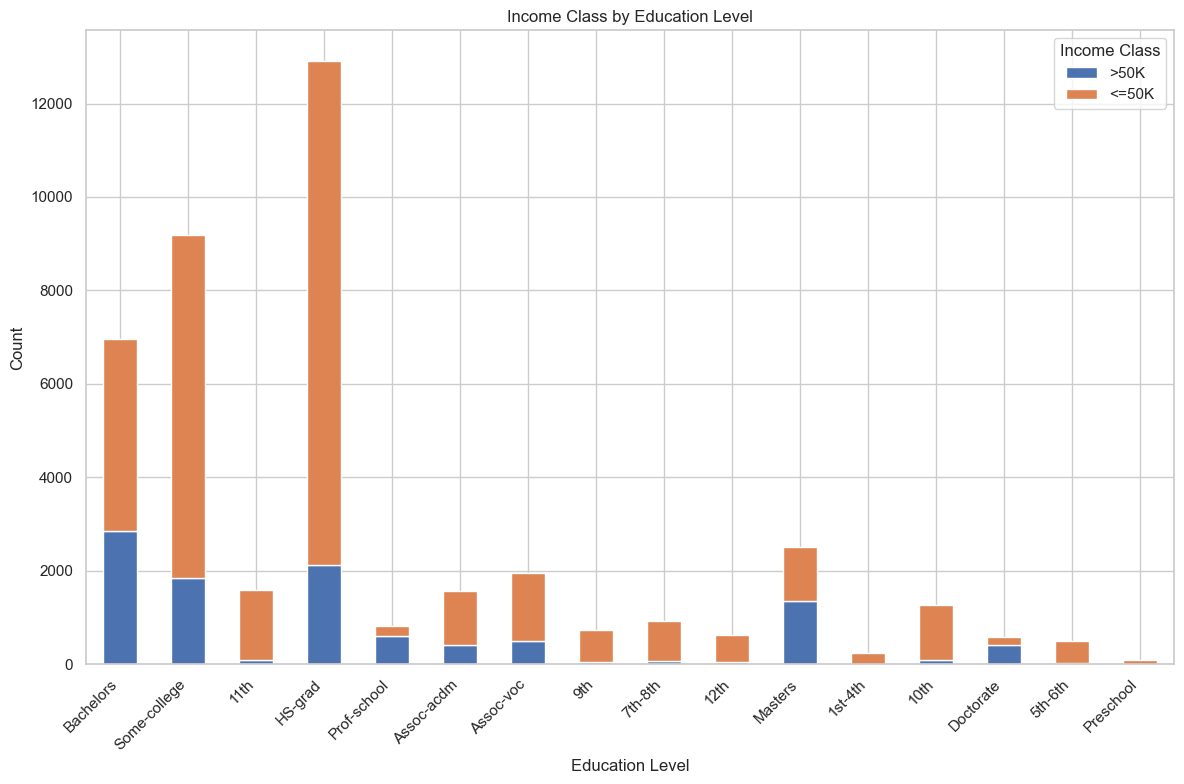

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_counts = pd.crosstab(df_adult['education'], df_adult['class'])

df_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Income Class by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Class')
plt.tight_layout()
plt.show()

Lets now try a scatter plot to understand the relation between age and hours worked

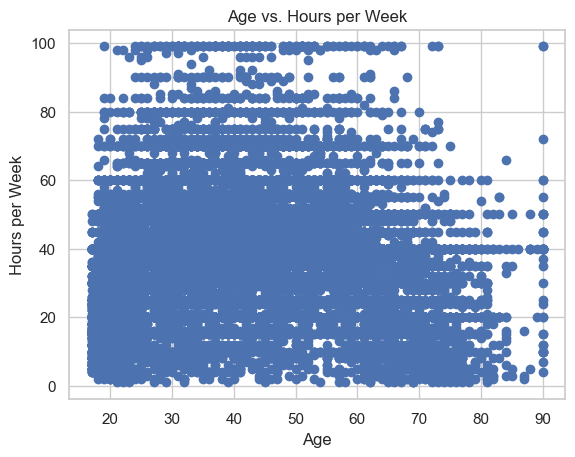

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(x=df_adult['age'], y=df_adult['hours-per-week'])

plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Age vs. Hours per Week')

plt.show()


#### 3. Multivariate Analysis (three or more variables at once)  
Explores **interactions between multiple features** at the same time.  

- **Correlation Heatmap (numerical features):**   
  - Shows which features are correlated (e.g., *education_num* vs *education*).  
  - Helps detect redundancy: if two features are strongly correlated, one may be dropped later.  


                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.022846      0.072584      0.046617   
education-num   0.022846       1.000000      0.127616      0.081789   
capital-gain    0.072584       0.127616      1.000000     -0.035982   
capital-loss    0.046617       0.081789     -0.035982      1.000000   
hours-per-week  0.036712       0.134061      0.081645      0.051698   

                hours-per-week  
age                   0.036712  
education-num         0.134061  
capital-gain          0.081645  
capital-loss          0.051698  
hours-per-week        1.000000  


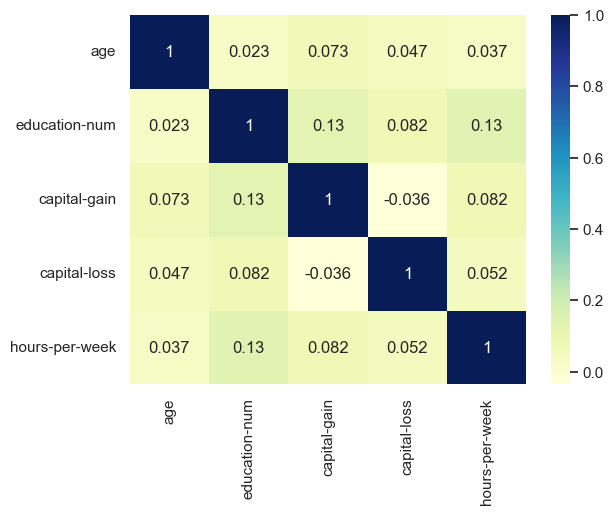

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

co_mtx = df_adult.corr(numeric_only=True)

print(co_mtx)

sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

plt.show()

### **Summary of EDA Insights**

From our exploratory analysis of the Adult Income dataset, here are the key takeaways:  

1. **Demographics**  
   - Most individuals in the dataset are in the **30-50 age range**.  
   - Gender distribution is highly skewed towards **male**.  

2. **Education**  
   - The most common education levels are **HS-grad** and **Some-college**.  
   - Higher education levels (like **Masters/Doctorate**) appear less frequently. 
   - **HS-Grad** contains most propotion of people earning above 50k 

3. **Work-related features**  
   - Most people work **~40 hours per week** (full-time).  
   - A smaller portion works overtime (>50 hours), and very few work extremely low hours.  

5. **Capital gains/losses**  
   - Both features are **highly skewed**: most people have zero, with a few extreme values.  
   - These are valid rare cases rather than errors, so instead of dropping them, transformations (like log scaling) may be useful later.  

6. **Feature relationships**  
   - The correlation heatmap shows **education_num** is strongly related to **capital-loss** .  
   - Most other numerical features have weak correlations, suggesting they may carry **independent signals**.  


These insights will guide us in **feature engineering** and **model building** in later steps.  
